Accuracy with original features: 0.9714285714285714
Confusion Matrix (original features):
[[94  1]
 [ 3 42]]
Accuracy with PCA-transformed features: 0.9642857142857143
Confusion Matrix (PCA-transformed features):
[[92  3]
 [ 2 43]]


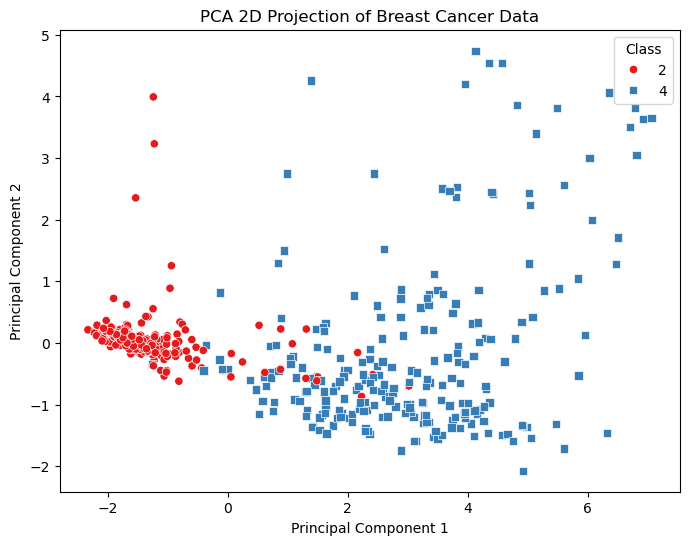

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('D:/breast-cancer-wisconsin.csv')

df = df.apply(pd.to_numeric, errors='coerce')
df.replace('?', float('nan'), inplace=True)

X = df.drop(columns=['id', 'benormal'])
y = df['benormal']

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svc_original = SVC(kernel='linear')
svc_original.fit(X_train, y_train)

X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svc_pca = SVC(kernel='linear')
svc_pca.fit(X_train_pca, y_train)

y_pred_original = svc_original.predict(X_test)
y_pred_pca = svc_pca.predict(X_test_pca)

accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print(f"Accuracy with original features: {accuracy_original}")
print(f"Confusion Matrix (original features):\n{conf_matrix_original}")
print(f"Accuracy with PCA-transformed features: {accuracy_pca}")
print(f"Confusion Matrix (PCA-transformed features):\n{conf_matrix_pca}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", style=y, markers=["o", "s"])
plt.title('PCA 2D Projection of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()